# Принятие решений в бизнесе на основе данных

**Описание задания**:
Отдел маркетинга крупного интернет-магазина  подготовил список гипотез для увеличения выручки.


**Цель исследования** — Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Описание материалов**:
9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort (файл hypothesis.csv).

Проведен A/B-тест и получены результаты, которые описаны в файлах orders.csv и visitors.csv.

**Описание данных**:

    Файл /datasets/hypothesis.csv
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

    Файл /datasets/orders.csv 
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.
    
    Файл /datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Часть 1. Приоритизация гипотез.

Импортируем библиотеки, прочитаем файл.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
df = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 100
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# приведение названий столбцов таблицы df к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

#### 1.Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
df['ICE']= df['impact']*df['confidence'] / df['efforts']
df.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


#### 2.Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
df['RICE'] = df['reach']*df['impact']*df['confidence']/df['efforts']

df.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


#### 3.Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

Если при приориттизации методом ICE самыми приоритетными были гипотезы под номерами 8,0,7, то при приоритизации методом RICE самыми приоритетными были гипотезы под номерами 7,2,0.

Это произошло, потому что при приоритизации методом RICE учитывается параметр reach. У гипотезы под номером 8 данный параметр равен 1, у гипотезы под номером 7 данный параметр самый высокий и равен 10. 

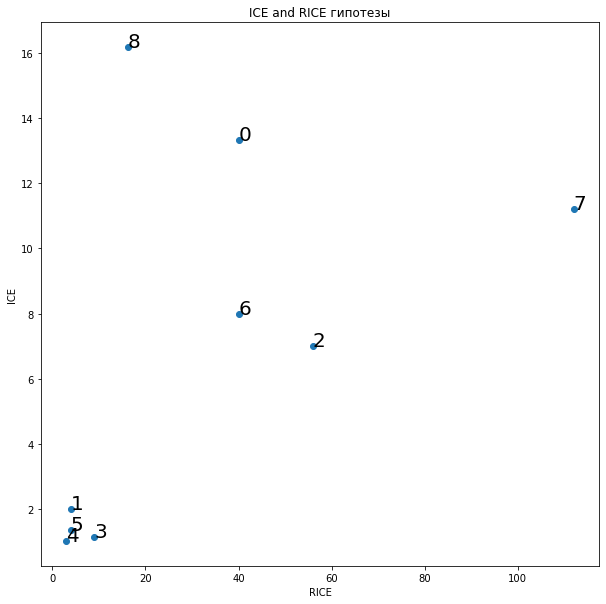

In [6]:
#Для наглядности отразим гипотезы на графике
y = df['ICE'] 
z = df['RICE'] 
n = df.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=20)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show() 

### Часть 2. Анализ A/B-теста

In [7]:
#Прочитаем файлы
visitors = pd.read_csv('/datasets/visitors.csv')
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
orders = pd.read_csv('/datasets/orders.csv')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
# приведение названий столбцов таблицы orders к нижнему регистру
orders.columns = orders.columns.str.lower()
orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [12]:
#Приведение столбцов с датами к нужному формату
visitors['date']= pd.to_datetime(visitors['date'], format='%Y.%m.%d')
orders['date']= pd.to_datetime(orders['date'], format='%Y.%m.%d')

Проверим таблицы на дубликаты.

In [13]:
visitors.duplicated().sum()

0

In [14]:
orders.duplicated().sum()

0

Дубликатов нет.

<b>Необходимо проверить, не попадают ли какие-нибудь пользователи в обе группы в таблице с заказами.</b>

In [15]:
orders.groupby('visitorid').agg({'group': 'nunique'}).query('group>1')

,group
visitorid,
8300375,2
199603092,2
232979603,2
237748145,2
276558944,2
351125977,2
393266494,2
457167155,2
471551937,2


Удалим пользователей, попавших в 2 группы из таблицы.

In [16]:
# количество уникальных пользователей в группе А
orders.query('group=="A"')['visitorid'].nunique()
 
# количество уникальных пользователей в группе B
orders.query('group=="B"')['visitorid'].nunique()
 
# уникальные пользователи группы А
user_a=orders.query('group=="A"')['visitorid'].unique()
 
# пользователи которые присутсвуют в обеих группах
recurring_users=orders.query('group=="B"')['visitorid'][orders.query('group=="B"')['visitorid'].isin(user_a)]
 
# количество пользователей которые входят в обе группы
recurring_users.count()
 
# удаление пользователей, которые входят в обе группы
ordersclear=orders[~orders['visitorid'].isin(recurring_users)]
 
# количество уникальных пользователей после удаления в группе А
ordersclear.query('group=="A"')['visitorid'].nunique()
 
# количество уникальных пользователей после удаления в группе В
ordersclear.query('group=="B"')['visitorid'].nunique()

528

In [17]:
#Определим дату начала теста
ordersclear['date'].min()

Timestamp('2019-08-01 00:00:00')

In [18]:
#Определим дату окончания теста
ordersclear['date'].max()

Timestamp('2019-08-31 00:00:00')

<b> Перед построением куммулятивных графиков соберем  кумулятивные данные.</b>

In [19]:
import warnings
warnings.filterwarnings("ignore")

# создаем массив уникальных пар значений дат и групп теста
datesGroups = ordersclear[['date','group']].drop_duplicates() 

#Соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: ordersclear[np.logical_and(ordersclear['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

#Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])  

# создаем массив уникальных пар значений дат и групп теста
datesGroups = ordersclear[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: ordersclear[np.logical_and(ordersclear['date'] <= x['date'], ordersclear['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [20]:
#Определим дату начала теста
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [21]:
#Определим дату окончания теста
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

Датафрейм cummulativeData был создан корректно, так как минимальная и максимальная даты в этом датафрейме совпадают с минимальной и максимальной датой в исходных данных.

#### 1.Построим график кумулятивной выручки по группам. 

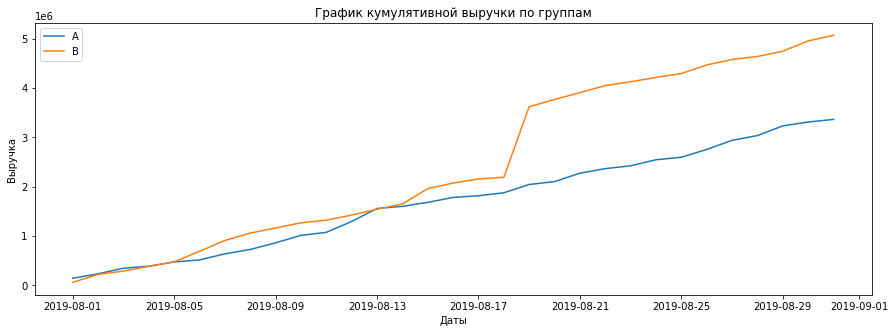

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title("График кумулятивной выручки по группам") 
plt.xlabel("Даты") 
plt.ylabel("Выручка")
plt.legend() 

Выручка увеличивается в течение всего теста. Это хороший знак.
Однако, график выручки группы B резко растет в одной точке (18-19 августа). Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

#### 2.Построим график кумулятивного среднего чека по группам. 

Text(0, 0.5, 'Величина среднего чека')

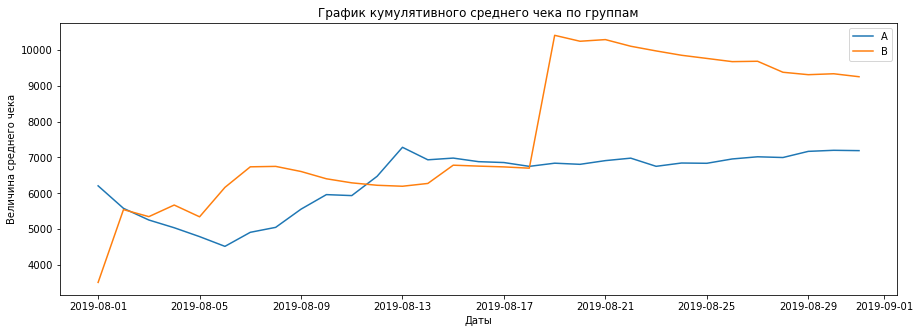

In [23]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title("График кумулятивного среднего чека по группам") 
plt.xlabel("Даты") 
plt.ylabel("Величина среднего чека")

График кумулятивного среднего чека аналогичен графику кумулятивной выручки.

#### 3.Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Text(0, 0.5, 'Относительное изменение')

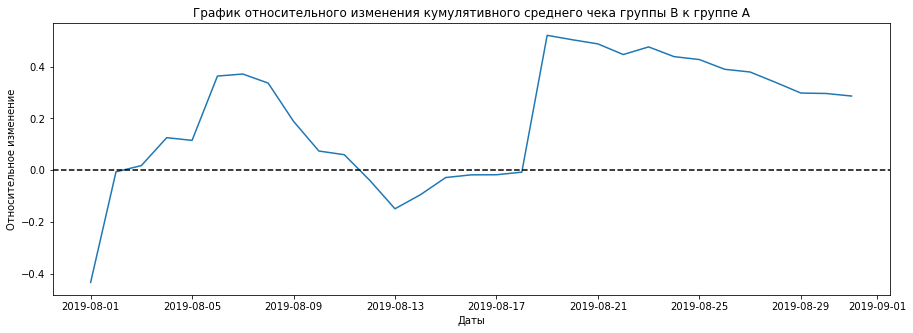

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A") 
plt.xlabel("Даты") 
plt.ylabel("Относительное изменение")

В нескольких точках график различия между сегментами резко «скачет». Следовательно, где-то есть крупные заказы и выбросы.

#### 4.Построим график кумулятивной конверсии по группам. 

Text(0, 0.5, 'Конверсия')

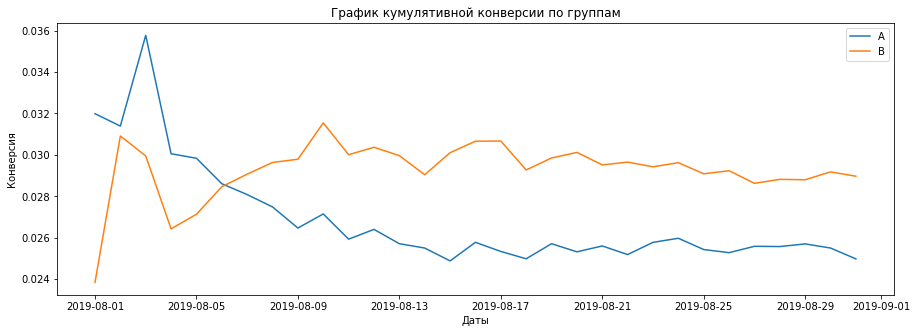

In [25]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("График кумулятивной конверсии по группам") 
plt.xlabel("Даты") 
plt.ylabel("Конверсия")

Конверсия группы А была максимальной 2-3 августа, с 9 августа конверсия группы А стабилизировалась на уровне 0,25-0,26. 

С 10 августа конверсия группы B больше группы А.

#### 5.Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

Text(0, 0.5, 'Относительное изменение')

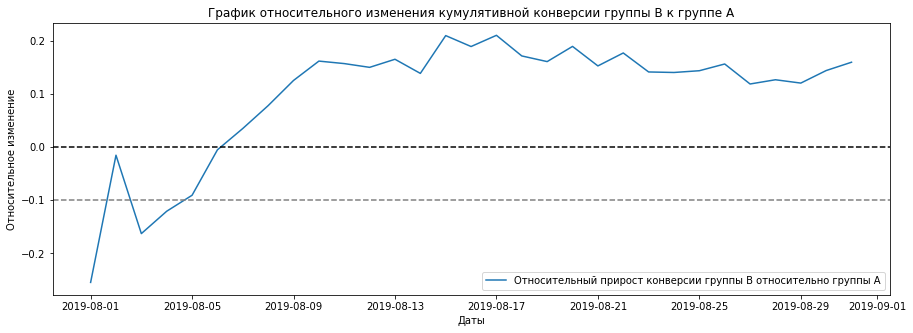

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.title("График относительного изменения кумулятивной конверсии группы B к группе A") 
plt.xlabel("Даты") 
plt.ylabel("Относительное изменение")

Из графика видно, что начиная с 10 августа конверсия группы В значительно выше конверсии в группе А. Наибольшая  разница с группой А на максимуме составила около 20%.

#### 6.Построим точечный график количества заказов по пользователям.

In [27]:
ordersByUsers = ordersclear.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False). \
                                                                        agg({'transactionid' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


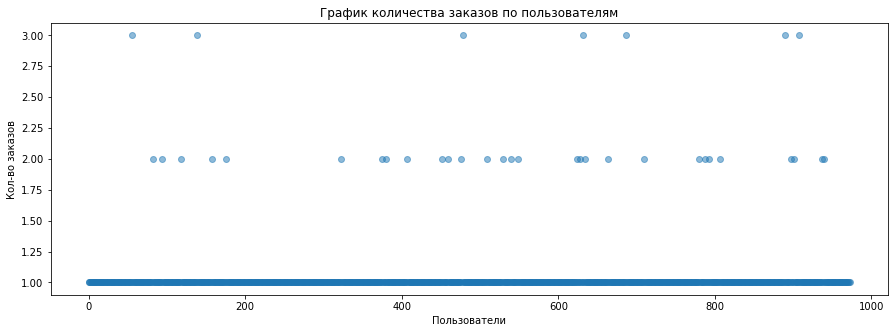

In [28]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.title('График количества заказов по пользователям')
plt.xlabel("Пользователи") 
plt.ylabel("Кол-во заказов")
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5)

Большая часть пользователей сделали 1 заказ. Пользователей, совершивших 2-3 заказа немного.

#### 7.Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей оформляли больше чем 1 заказ и не более 1% пользователей заказывали более двух заказов.
Выберем за нижнюю границу числа заказов на одного пользователя - не более 2.

#### 8.Построим точечный график стоимостей заказов.

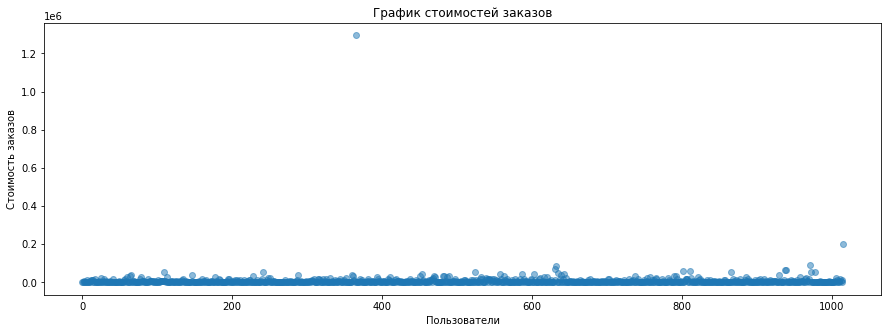

In [30]:
x_values = pd.Series(range(0,len(ordersclear['revenue'])))
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов')
plt.xlabel("Пользователи") 
plt.ylabel("Стоимость заказов")
plt.scatter(x_values, ordersclear['revenue'], alpha=0.5) 

На графике заметны выбросы, один - более 1,2 млн и еще один - более 200 тыс.
Остальные значения менее 200 тыс.

#### 9.Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [31]:
np.percentile(ordersclear['revenue'], [95, 99])

array([26785., 53904.])

99% заказов меньше суммы 53904руб, установим её в качестве границы для аномальных заказов.

#### 10.Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [32]:
#Соберем все данные по заказам и визитам (а также добавим кумулятивные показатели) в одну таблицу/

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = ordersclear[ordersclear['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = ordersclear[ordersclear['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

#Соединим все в 1 таблицу
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой. В sampleA сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой (пороговое значение возьмём равное 5%).

За нулевую гипотезу примем - статистически значимых различий в конверсии между группами нет, тогда альтернативная гипотеза будет - статистически значимые различия есть.

In [33]:
ordersByUsersA = ordersclear[ordersclear['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = ordersclear[ordersclear['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsersB.columns = ['userid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.011
Относительный показатель 'B' и 'A' = 0.160


p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит, что по сырым данным различия в конверсии групп A и B есть. А относительное превышение группы B над A равно 16%.

#### 11.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

За нулевую гипотезу примем - статистически значимых различий в средних чеках между группами нет, тогда альтернативная гипотеза будет - статистически значимые различия есть.

In [34]:
print("alpha =",0.05)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(ordersclear[ordersclear['group']=='A']['revenue'], ordersclear[ordersclear['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(ordersclear[ordersclear['group']=='B']['revenue'].mean()/ordersclear[ordersclear['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.829
Относительный показатель 'B' и 'A' = 0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. И при этом, средний чек группы B значительно выше среднего чека группы A (на 28,7%).

#### 12.Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

За нулевую гипотезу примем - статистически значимых различий в конверсии между группами нет, тогда альтернативная гипотеза будет - статистически значимые различия есть.

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 53904руб, — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [35]:
#Узнаем, сколько всего аномальных пользователей методом shape()

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [99])[0]]['userid'], ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [99])[0]]['userid']], axis = 0)
usersWithExpensiveOrders = ordersclear[ordersclear['revenue'] > np.percentile(ordersclear['revenue'], [99])[0]]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего аномальных пользователей =" ,len(abnormalUsers)) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
Всего аномальных пользователей = 16


Всего 16 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [36]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

In [37]:
#Применим статистический критерий Манна-Уитни к полученным выборкам:
print("alpha =",0.05)
print("p-value = {0:.4f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель группы B и A = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.0070
Относительный показатель группы B и A = 0.189


p-value равен 0.007 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит, что  и по очищенным данным различия в конверсии групп A и B есть. А относительный показатель превышения группы B над A равен 18,9% (выше, чем с сырыми данными  16.0%) .

#### 13.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

За нулевую гипотезу примем - статистически значимых различий в средних чеках между группами нет, тогда альтернативная гипотеза будет - статистически значимые различия есть.

In [38]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    ordersclear[np.logical_and(
        ordersclear['group']=='A',
        np.logical_not(ordersclear['visitorid'].isin(abnormalUsers)))]['revenue'],
    ordersclear[np.logical_and(
        ordersclear['group']=='B',
        np.logical_not(ordersclear['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

print("Относительный показатель B и A = {0:.3f}".format(
    ordersclear[np.logical_and(ordersclear['group']=='B',np.logical_not(ordersclear['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/
    ordersclear[np.logical_and(
        ordersclear['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.788
Относительный показатель B и A = -0.032


P-value значительно больше 0.05. Значит, нулевую гипотезу отвергать нельзя. Нельзясчитать, что в среднем чеке есть различия(как и с сырыми данными). Средний чек группы B ниже  на 3.2%  чека группы A, в то время как по сырым данным он был выше  на 28.7% (из-за аномальных заказов)

#### 14.Примем решение по результатам теста и объясним его. 

И по сырым и по очищенным данным различия в конверсии групп A и B есть. Относительное превышение группы B над A равно 18,9% по очищенным и 16.0% по сырым данным.

И по сырым и по очищенным данным различия в средних чеках групп A и B отстутствуют. Средний чек группы B ниже на 3.2% чека группы A, в то время как по сырым данным он был выше на 28.7% (из-за аномальных заказов).

Исходя из результатов тестирования можно принять решение остановить тест. Зафиксировано  отсутствие существенных различий  между группами.Группа B  лучше группы A по конверсии, но хуже по среднему чеку.